# Intro to ML - Homework 4

**Name:** Sophia Godfrey

**Student ID:** 801149485

**Github:** https://github.com/QueenSophiaLo/Intro-To-ML/tree/main/Homework%204


**Problem 1**

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign)

In [78]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [79]:
# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA (feature extraction)
pca = PCA()

# metrics to plot for different values of K
accuracy_list = []
precision_list = []
recall_list = []
f1_list = [] # F1 Score is the weighted average of Precision and Recall
k_value = list(range(1, X_train.shape[1] + 1))  # the number of features, K ranges 1-30

In [80]:
# Evaluate SVM performance for each number of PCA components
for k in k_value:
    # Reduce data dimensionality using PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Fit SVM with a linear kernel on the reduced data
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_pca, y_train)

    # Make predictions on the test set
    predictions = svm_model.predict(X_test_pca)

    # Compute evaluation metrics
    acc_score = accuracy_score(y_test, predictions)
    prec_score = precision_score(y_test, predictions)
    rec_score = recall_score(y_test, predictions)
    f1_score_val = f1_score(y_test, predictions)

    # Save metrics for later plotting
    accuracy_list.append(acc_score)
    precision_list.append(prec_score)
    recall_list.append(rec_score)
    f1_list.append(f1_score_val)

In [81]:
# Find the optimal number of K components
best_k = k_value[np.argmax(accuracy_list)]
print(f"The optimal number of principal components (K): {best_k}")
print(f"Highest accuracy K:{best_k}: {np.max(accuracy_list)}")

The optimal number of principal components (K): 28
Highest accuracy K:28: 0.9824561403508771


Plot your classification accuracy, precision, and recall.

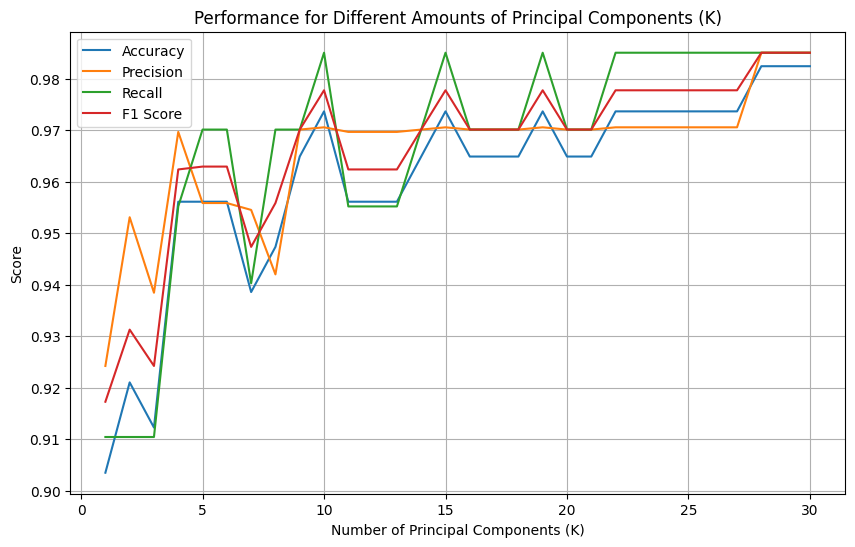

In [82]:
# Plot over different values of K
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_value, accuracy_list, label='Accuracy')
plt.plot(k_value, precision_list, label='Precision')
plt.plot(k_value, recall_list, label='Recall')
plt.plot(k_value, f1_list, label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance for Different Amounts of Principal Components (K)')
plt.legend()
plt.grid(True)
plt.show()

Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

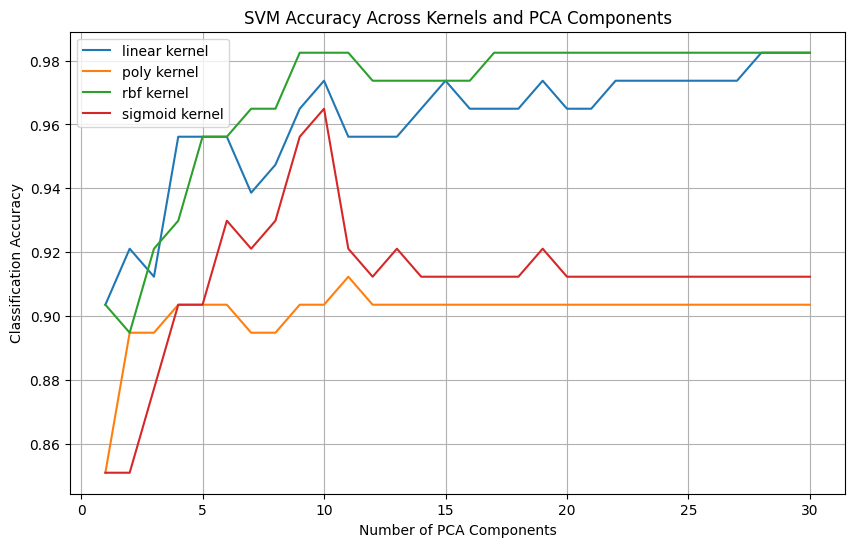

In [83]:
# Define the range of PCA components and the SVM kernels to test
component_range = list(range(1, X_train.shape[1] + 1))
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Dictionary to save accuracy for each kernel across different PCA dimensions
results_by_kernel = {kernel: {'components': [], 'accuracy': []} for kernel in svm_kernels}

# Iterate over each kernel type
for kernel in svm_kernels:
    # Keep track of the highest accuracy and the corresponding number of components
    top_accuracy = 0
    optimal_k = None

    # Test SVM performance for each number of PCA components
    for k in component_range:
        # Apply PCA to reduce feature dimensions
        pca_model = PCA(n_components=k)
        X_train_reduced = pca_model.fit_transform(X_train)
        X_test_reduced = pca_model.transform(X_test)

        # Train the SVM model with the current kernel
        svm_model = SVC(kernel=kernel, random_state=0)
        svm_model.fit(X_train_reduced, y_train)

        # Make predictions and calculate accuracy
        predictions = svm_model.predict(X_test_reduced)
        acc = accuracy_score(y_test, predictions)

        # Save accuracy for plotting
        results_by_kernel[kernel]['components'].append(k)
        results_by_kernel[kernel]['accuracy'].append(acc)

        # Update best accuracy and corresponding K if current is better
        if acc > top_accuracy:
            top_accuracy = acc
            optimal_k = k

# Visualize how accuracy changes with PCA components for each kernel
plt.figure(figsize=(10, 6))
for kernel in svm_kernels:
    plt.plot(results_by_kernel[kernel]['components'],
             results_by_kernel[kernel]['accuracy'],
             label=f'{kernel} kernel')

plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Accuracy')
plt.title('SVM Accuracy Across Kernels and PCA Components')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
import pandas as pd

# List to store kernel summary
kernel_summary = []

# Loop over each kernel type
for kernel in svm_kernels:
    best_accuracy = 0
    best_k = None

    for k in k_value:
        # Apply PCA
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVM
        svm = SVC(kernel=kernel, random_state=0)
        svm.fit(X_train_pca, y_train)

        # Predict and calculate accuracy
        Y_pred = svm.predict(X_test_pca)
        accuracy = accuracy_score(y_test, Y_pred)

        # Update best accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k

    # Append results to the list
    kernel_summary.append({
        'Kernel': kernel,
        'Best K': best_k,
        'Accuracy for Best K': best_accuracy
    })

# Convert to DataFrame and display as a table
kernel_table = pd.DataFrame(kernel_summary)
print(kernel_table)

    Kernel  Best K  Accuracy for Best K
0   linear      28             0.982456
1     poly      11             0.912281
2      rbf       9             0.982456
3  sigmoid      10             0.964912


**Problem 2**

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [85]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# load housing dataset
filePath = '/content/drive/MyDrive/Colab Notebooks/Housing.csv'
df = pd.read_csv(filePath)

# Display first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [86]:
# Impute numeric columns if there are NaNs
numeric_cols = ['area','bedrooms','bathrooms','stories','parking']
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Convert binary categorical columns to 0/1
binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Remove any constant columns (zero variance)
for col in numeric_cols + binary_cols:
    if df[col].nunique() <= 1:
        print(f"Removing constant column: {col}")
        df.drop(columns=[col], inplace=True)

In [87]:
# Define features and target
feature_cols = ['area', 'bedrooms', 'bathrooms', 'stories',
                'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                'airconditioning', 'parking', 'prefarea']
X = df[feature_cols].values
y = df['price'].values

# Remove any samples with missing target
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

In [88]:
# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [89]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure no NaNs or Infs
X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=0.0, neginf=0.0)

In [90]:
# Dictionary to store results
results = []
predictions = {}

# Train SVR models with different kernels
svr_kernels = {
    'RBF': SVR(kernel='rbf', C=1000, gamma=0.1),
    'Linear': SVR(kernel='linear', C=1000),
    'Polynomial': SVR(kernel='poly', C=1000, degree=2)
}

for name, model in svr_kernels.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': f'{name} SVR',
        'MSE': round(mse, 2),
        'R2': round(r2, 3)
    })

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_ridge_pred = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

results.append({
    'Model': 'Ridge Regression',
    'MSE': round(ridge_mse, 2),
    'R2': round(ridge_r2, 3)
})

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

              Model           MSE     R2
0           RBF SVR  4.066866e+12 -0.060
1        Linear SVR  2.483255e+12  0.353
2    Polynomial SVR  4.115708e+12 -0.072
3  Ridge Regression  1.303046e+12  0.661


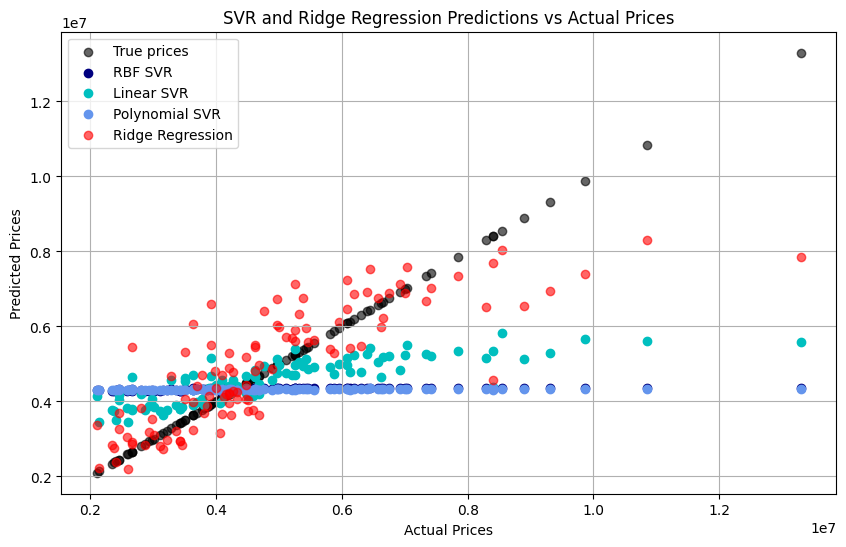

In [91]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='black', label='True prices', alpha=0.6)

colors = ['navy', 'c', 'cornflowerblue']
for color, name in zip(colors, svr_kernels.keys()):
    plt.scatter(y_test, predictions[name], color=color, label=f'{name} SVR')

plt.scatter(y_test, y_ridge_pred, color='red', label='Ridge Regression', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR and Ridge Regression Predictions vs Actual Prices")
plt.legend()
plt.grid(True)
plt.show()